# Graduate Admission

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

In [60]:
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Input, Dense, Activation,Dropout,LSTM
from tensorflow.keras.models import Sequential
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [30]:
data=pd.read_csv("Admission_Predict.csv")

In [31]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
data.shape

(400, 9)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [34]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


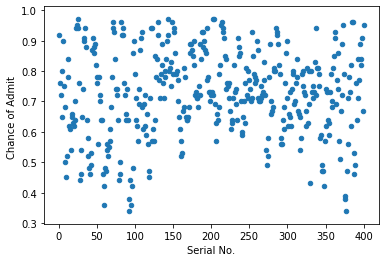

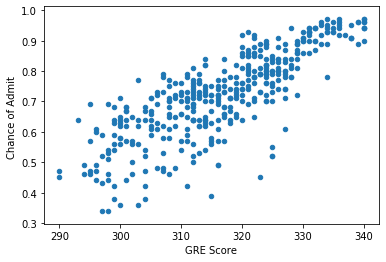

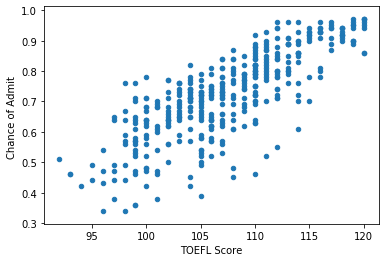

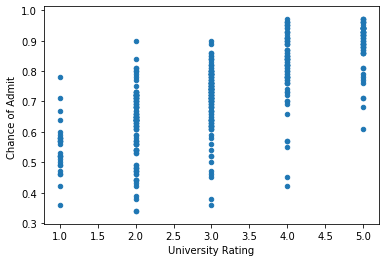

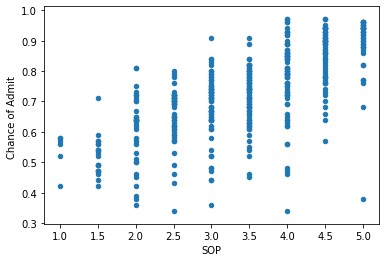

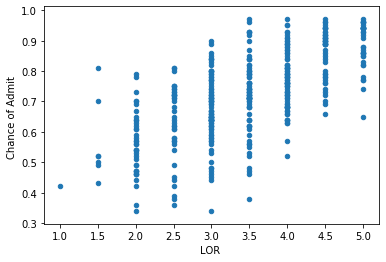

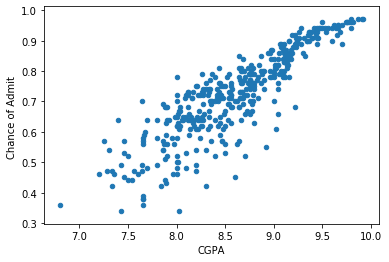

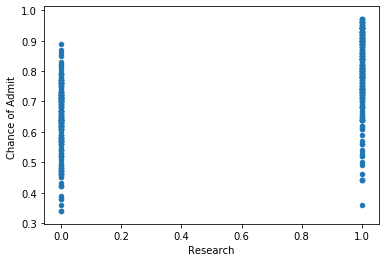

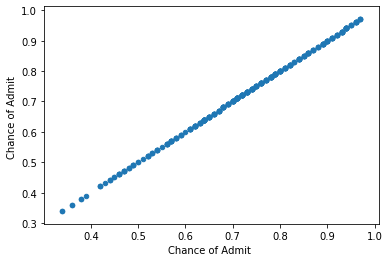

In [38]:
for f in data.columns:
    data.plot.scatter(x=f, y="Chance of Admit ");

In [35]:
data_features=data.copy()
data_labels=data_features.pop("Chance of Admit ")


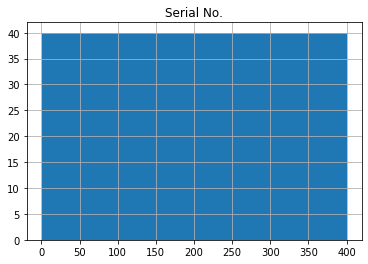

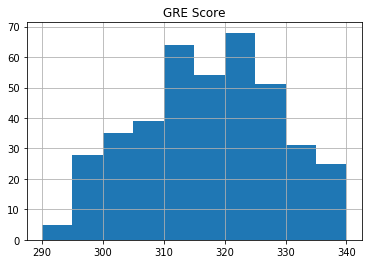

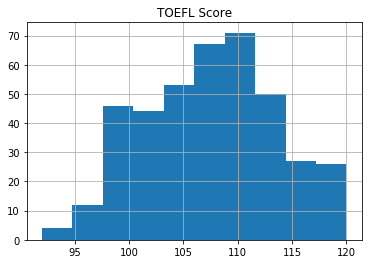

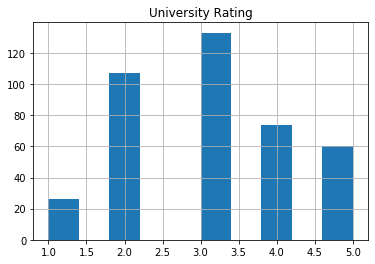

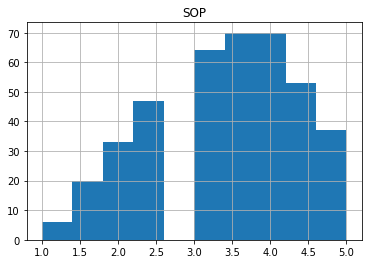

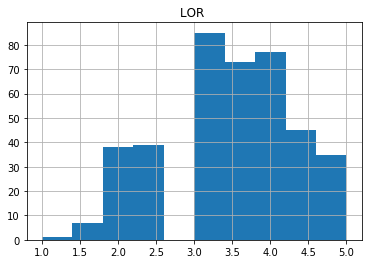

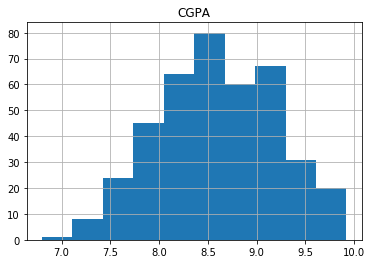

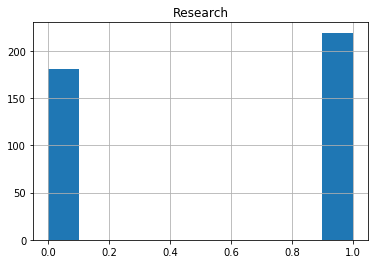

In [39]:
for f in data_features.columns:
    data.hist(f);

In [50]:
data_features=np.array(data_features)
data_labels=np.array(data_labels)
data_features

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   9.65,   1.  ],
       [  2.  , 324.  , 107.  , ...,   4.5 ,   8.87,   1.  ],
       [  3.  , 316.  , 104.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [398.  , 330.  , 116.  , ...,   4.5 ,   9.45,   1.  ],
       [399.  , 312.  , 103.  , ...,   4.  ,   8.78,   0.  ],
       [400.  , 333.  , 117.  , ...,   4.  ,   9.66,   1.  ]])

In [110]:
def plot_loss(history,upper):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, upper+0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [113]:
def predict_results(model,history):
    trainPredict=model.predict(X_train)
    testPredict=model.predict(X_test)
    trainPredict=np.expm1(trainPredict)
    trainY=np.expm1(y_train)
    testPredict=np.expm1(testPredict)
    testY=np.expm1(y_test)
    trainScore=math.sqrt(mean_squared_error(trainY,trainPredict[:,0]))
    print("Train Score:", trainScore)
    testScore=math.sqrt(mean_squared_error(testY,testPredict[:,0]))
    print("Test Score:" ,testScore)
    plot_loss(history,testScore)

## Modeling without data Split

In [41]:
data_model=tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])

In [42]:
data_model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam())

In [57]:
history=data_model.fit(data_features,data_labels,epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 914us/step - loss: 0.3016
Epoch 2/100
13/13 [==============================] - 0s 842us/step - loss: 0.3012
Epoch 3/100
13/13 [==============================] - 0s 749us/step - loss: 0.2990
Epoch 4/100
13/13 [==============================] - 0s 918us/step - loss: 0.2982
Epoch 5/100
13/13 [==============================] - 0s 831us/step - loss: 0.2943
Epoch 6/100
13/13 [==============================] - 0s 751us/step - loss: 0.2946
Epoch 7/100
13/13 [==============================] - 0s 668us/step - loss: 0.2932
Epoch 8/100
13/13 [==============================] - 0s 833us/step - loss: 0.2921
Epoch 9/100
13/13 [==============================] - 0s 666us/step - loss: 0.2926
Epoch 10/100
13/13 [==============================] - 0s 830us/step - loss: 0.2918
Epoch 11/100
13/13 [==============================] - 0s 830us/step - loss: 0.2904
Epoch 12/100
13/13 [==============================] - 0s 834us/step - loss: 0.2836
Epoch 13/100


13/13 [==============================] - 0s 830us/step - loss: 0.1494
Epoch 100/100
13/13 [==============================] - 0s 915us/step - loss: 0.1387


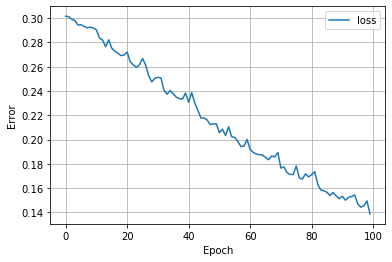

In [58]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

As there is no testing data we evaluated the error over each epoch

## Data Model using train and test split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_labels, test_size=0.20, random_state=42)

In [124]:
model=Sequential()

In [125]:
model.add(Dense(1))
model.add(Dense(64))

In [126]:
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam())

In [127]:
history=model.fit(X_train,y_train,epochs=200,batch_size=10,validation_split=0.2)

Epoch 1/200
26/26 [==============================] - 0s 5ms/step - loss: 2299.2797 - val_loss: 1720.8179
Epoch 2/200
26/26 [==============================] - 0s 2ms/step - loss: 1548.9060 - val_loss: 1192.4720
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 1072.6588 - val_loss: 844.2969
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 768.6570 - val_loss: 610.6543
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 557.3336 - val_loss: 449.3769
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 409.7623 - val_loss: 336.6239
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 314.5328 - val_loss: 255.0852
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 236.6914 - val_loss: 195.6621
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 179.3335 - val_loss: 151.4032
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - 

26/26 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0199
Epoch 83/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0199
Epoch 84/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0200
Epoch 85/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0199
Epoch 86/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0199
Epoch 87/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0198
Epoch 88/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0199
Epoch 89/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0199
Epoch 90/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0199
Epoch 91/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0201
Epoch 92/200


26/26 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0198
Epoch 164/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0199
Epoch 165/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0202
Epoch 166/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0198
Epoch 167/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0199
Epoch 168/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0203
Epoch 169/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0202
Epoch 170/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0200
Epoch 171/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0200
Epoch 172/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0201
Epoc

In [128]:
trainPredict=model.predict(X_train)
testPredict=model.predict(X_test)
trainPredict=np.expm1(trainPredict)
trainY=np.expm1(y_train)
testPredict=np.expm1(testPredict)
testY=np.expm1(y_test)

In [129]:
trainScore=math.sqrt(mean_squared_error(trainY,trainPredict[:,0]))
trainScore

0.26623802532778046

In [130]:
testScore=math.sqrt(mean_squared_error(testY,testPredict[:,0]))
testScore

0.3169730411092208

Train Score: 0.26623802532778046
Test Score: 0.3169730411092208


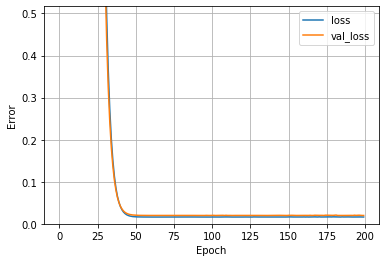

In [131]:
predict_results(model,history)

## Normalize the training data 

In [79]:
data_feature_normalizer=preprocessing.Normalization()

In [80]:
data_feature_normalizer.adapt(np.array(X_train))

In [93]:
model2=Sequential()

In [94]:
model2.add(data_feature_normalizer)

In [95]:
model2.add(Dense(64))
model2.add(Dense(1))

In [96]:
model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss="mean_absolute_error")

In [97]:
history=model2.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 0s 15ms/step - loss: 1.6544 - val_loss: 0.7218
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5615 - val_loss: 0.9046
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5897 - val_loss: 0.1963
Epoch 4/200
8/8 [==============================] - 0s 35ms/step - loss: 0.2249 - val_loss: 0.2306
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2115 - val_loss: 0.1698
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1659 - val_loss: 0.0804
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1065 - val_loss: 0.1436
Epoch 8/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1196 - val_loss: 0.0813
Epoch 9/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0860 - val_loss: 0.0752
Epoch 10/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0750 - val_loss: 0.1175
Epoch 11/200
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.0748 - val_loss: 0.0498
Epoch 85/200
8/8 [==============================] - 0s 6ms/step - loss: 0.0669 - val_loss: 0.0522
Epoch 86/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0617 - val_loss: 0.0661
Epoch 87/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0684 - val_loss: 0.0678
Epoch 88/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0705 - val_loss: 0.0683
Epoch 89/200
8/8 [==============================] - ETA: 0s - loss: 0.057 - 0s 5ms/step - loss: 0.0570 - val_loss: 0.0650
Epoch 90/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0612 - val_loss: 0.0487
Epoch 91/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0522 - val_loss: 0.0495
Epoch 92/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0621 - val_loss: 0.1071
Epoch 93/200
8/8 [==============================] - 0s 6ms/step - loss: 0.0712 - val_loss: 0.0407
Epoch 94/

Epoch 167/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1329 - val_loss: 0.0951
Epoch 168/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1088 - val_loss: 0.0558
Epoch 169/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0691 - val_loss: 0.0882
Epoch 170/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1003 - val_loss: 0.0672
Epoch 171/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1000 - val_loss: 0.0983
Epoch 172/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1220 - val_loss: 0.0572
Epoch 173/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0727 - val_loss: 0.0827
Epoch 174/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0761 - val_loss: 0.0877
Epoch 175/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0871 - val_loss: 0.0567
Epoch 176/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0930 - val_loss: 0.0972
Epoch 177/

In [99]:
test_results={}
test_results['linear_model'] = model2.evaluate(
   X_test, y_test, verbose=0)

In [100]:
test_results

{'linear_model': 0.07541419565677643}

Train Score: 0.17018209866106973
Test Score: 0.20090288427641706


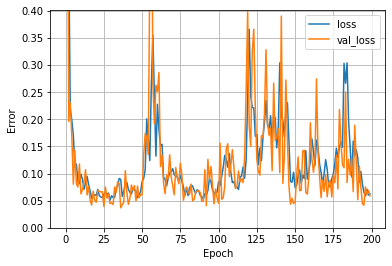

In [114]:
predict_results(model2,history)

## Using DNN regression 

In [132]:
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [133]:
dnn_model = build_and_compile_model(data_feature_normalizer)
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense_12 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [134]:
history = dnn_model.fit(
   X_train,y_train,
    validation_split=0.2, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3691 - val_loss: 0.1754
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2221 - val_loss: 0.1767
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1735 - val_loss: 0.1309
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1346 - val_loss: 0.1411
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1095 - val_loss: 0.0953
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0954 - val_loss: 0.0828
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0784 - val_loss: 0.0792
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0755 - val_loss: 0.0663
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0638 - val_loss: 0.0607
Epoch 10/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0559 - val_loss: 0.0632
Epoch 11/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.0510
Epoch 85/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.0530
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0545
Epoch 87/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0492
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 0.0503
Epoch 89/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0510
Epoch 90/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.0518
Epoch 91/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0173 - val_loss: 0.0487
Epoch 92/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.0519
Epoch 93/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.0509
Epoch 94/100
8/8 [===============

In [136]:
test_results['dnn_model'] = dnn_model.evaluate(
   X_test, y_test, verbose=0)
test_results

{'linear_model': 0.07541419565677643, 'dnn_model': 0.05245734378695488}

Train Score: 0.07479749944031513
Test Score: 0.13373359315499386


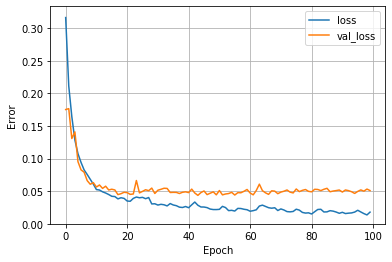

In [138]:
predict_results(dnn_model,history)

In [139]:
# dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [140]:
# model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [141]:
# model2.save('model2')

INFO:tensorflow:Assets written to: model2\assets
